[ 0.  0. -0. -0.  0.  0. -0. -0. -0. -0.]
[ 0.  0. -0.  0. -0. -0.  0.  0. -0.  0.]
[-0.01465759 -0.43283801 -0.01869342 -0.31158978  0.04908078 -0.05310312
  0.65876252  0.30593274  0.19618885 -0.37910018]

[ 0.  0. -0. -0.  0.  0. -0. -0. -0. -0.]
[ 0.  0. -0.  0. -0. -0.  0.  0. -0.  0.]
[-0.01465759 -0.43283801 -0.01869342 -0.31158978  0.04908078 -0.05310312
  0.65876252  0.30593274  0.19618885 -0.37910018]

0
[-0.  0. -0. -0.  0. -0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0. -0.  0. -0.]
[ 0.73126284  0.04542548  0.00898476 -0.0519015  -0.06185421 -0.67377807
  0.00083997  0.041495   -0.0262455  -0.0142301 ]

[-0.  0. -0. -0.  0. -0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0. -0.  0. -0.]
[ 0.73126284  0.04542548  0.00898476 -0.0519015  -0.06185421 -0.67377807
  0.00083997  0.041495   -0.0262455  -0.0142301 ]

1
[-0.  0. -0. -0.  0. -0. -0. -0.  0.  0.]
[ 0. -0.  0.  0.  0.  0. -0. -0.  0. -0.]
[ 0.02075905  0.0899486   0.03051693 -0.40955115 -0.02096239  0.70061272
  0.233

Text(0.5, 1.0, 'evolution of kkl for 2 distribution of same mean when their variances get closer ')

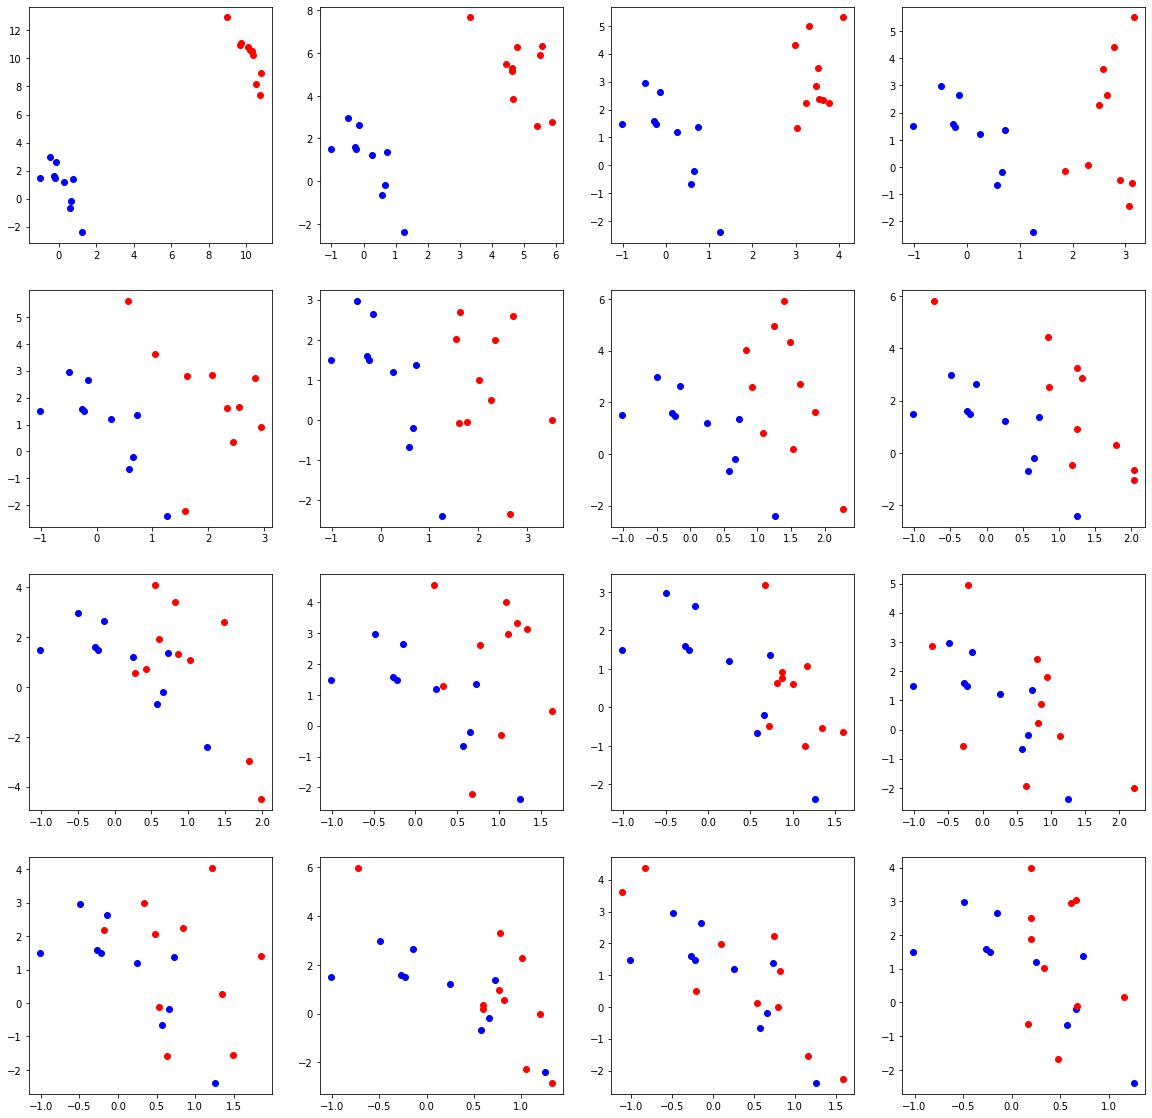

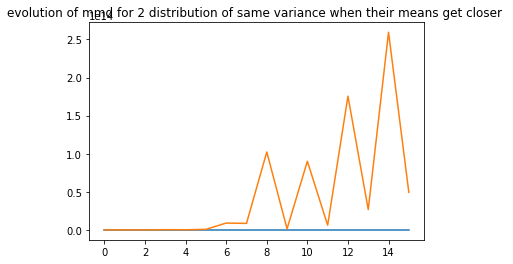

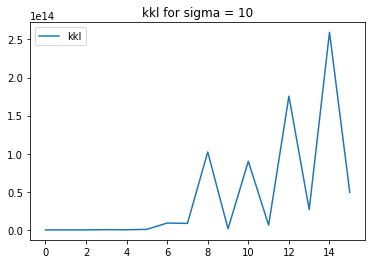

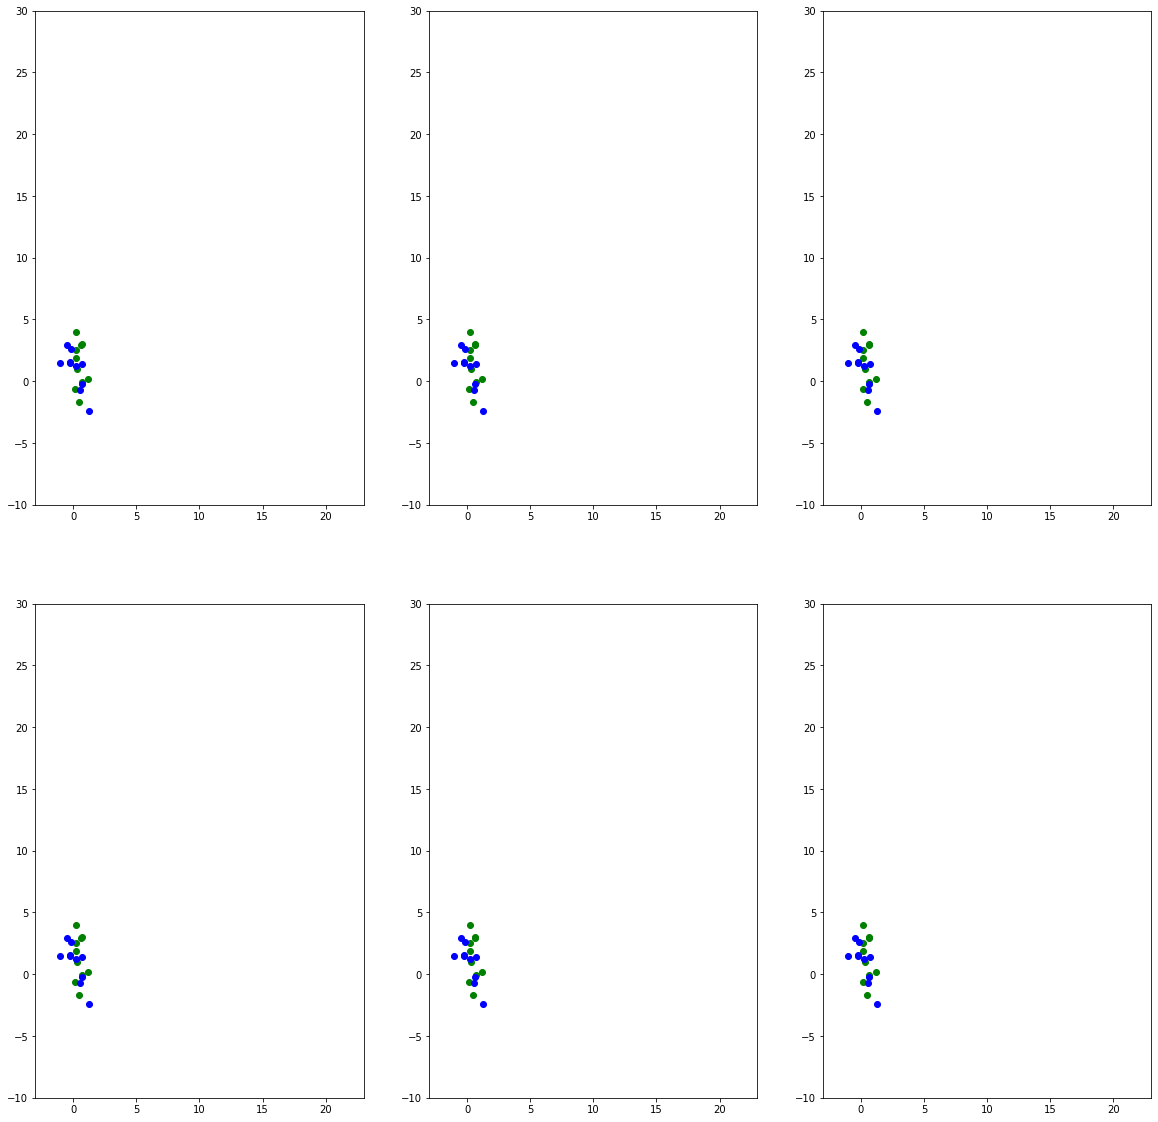

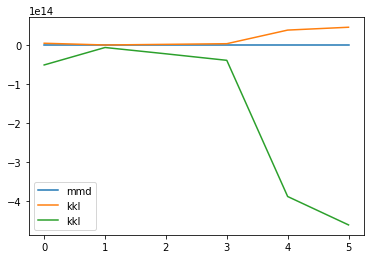

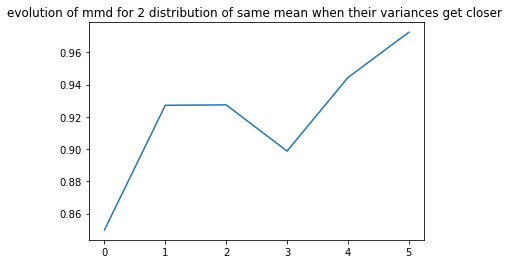

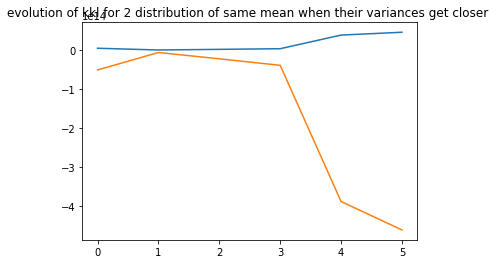

In [1]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

import divergences as dv
import kernels as kl
import generate_y as gy 

d = 2 #dimension of the particles 
n = 10 # nombre de particules pour p
m = 10 # nombre de particules pour q
alpha = 0.5
#T = 100 # nombre d'itérations

## KERNEL ###
sigm = lambda X,Y : 10 #np.max(np.linalg.norm(X-Y,axis = 1)) / (np.sqrt(1000 * np.log(10))) # np.abs(np.mean(np.linalg.norm(X,axis = 1)) - np.mean(np.linalg.norm(Y,axis = 1)))#max(2,np.linalg.norm(np.mean(x) - np.mean(y)))
k = lambda x,y,s :  kl.k_gauss(x,y,s)
dk = lambda x,y,s : kl.dk_gauss(x, y, s)



#######SIMULATION OF THE DATA#########

#Simulation of (X_i)_i<n ~ p
mux = np.array([10,10])
Mux = np.array([1/k *np.array([10,10]) for k in range(1,17)])
Lx = np.array([[1/2,1/3],[1/4,-2]])
Sigmax = Lx @ Lx.transpose()
SS = np.array([Sigmax * k for k in [6,5,4,3,2,1]])

#Simulation of (Y_i)_i<n ~ q 
muy = np.array([0,0])
Ly = np.array([[1/5, -1],[1/2,1/2]])
Sigmay = Sigmax #Lx @ Lx.transpose()
#Y = scs.multivariate_normal.rvs(muy,Sigmay,m)

#######################################################

###Generation of y ###
y = gy.gaussian(muy, Sigmax, m)
x = scs.multivariate_normal.rvs(np.zeros(2),0.2 * np.diag([1,2]),n) 


###### Ky ####
Ky = 1/m * np.array([[k(y[i],y[j],sigm(x,y)) for i in range(m)] for j in range(m)])
Ly,V = np.linalg.eig(Ky)
V = V.transpose()
Ly = np.real(Ly)
Packy = [Ky,Ly,V]


########PLOTS#########





""" Here we plot two gaussian distributions with same variance and
different mean and we draw the evolution of MMD, KKL and KDE when the
 means of one of the  distribution become closer to the other one"""

mmd = []
kkl = []
kde = []
k_trace = []
trxx = []

sig = [0.01,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1,1.5,2,3,4]

fig, axs = plt.subplots(4, 4, figsize=(20,20))
for j in range(16):
    #axs[j//4,j%4].axis([-3,23,-10,30])
    #YY = Y[np.linalg.norm(Y,axis = 1) > 5/(j+1)]
    #Ind = np.random.randint(len(YY),size = n)
    #k_j = lambda x,y : kl.k_gauss(x,y,np.linalg.norm(Mux[j])**(3/4))
    X = scs.multivariate_normal.rvs(Mux[j],Sigmax,n)
    #Z = np.random.choice([0,1],n,p = [1 - j/15,j/15])
    #X0 = scs.multivariate_normal.rvs(np.zeros(2),0.1 * np.identity(2),n)
    #X1 = gy.rings( 0.4 + j/150, 1.9 + j/150,0.5,1,n)
    #XX = np.array([X0,X1])
    #x = np.array([XX[Z[i],i] for i in range(n)])
    mmd.append(dv.MMD(X,y,lambda u,v : k(u,v,sigm(x,y))))
    kkl.append(dv.KKL(X,y,lambda u,v : k(u,v,sigm(x,y)),Packy,alpha)[0])
    trxx.append(dv.KKL(X,y,lambda u,v : k(u,v,sigm(x,y)),Packy,alpha)[1])
    #k_trace.append(dv.K_trace(X, k) - dv.K_trace(Y, k))
    #kde.append(dv.KDE(X, Y, k))
    axs[j//4,j%4].scatter(y[:,0],y[:,1],color = "blue")
    axs[j//4,j%4].scatter(X[:,0],X[:,1],color = "red")
    print(j)

    

    
plt.figure()
plt.plot(mmd,label = "mmd")
plt.plot(kkl,label = "kkl")
plt.title("evolution of mmd for 2 distribution of same variance when their means get closer ")

plt.figure()
plt.plot(kkl,label = "kkl")
#plt.plot(trxx)
#plt.plot(k_trace,label = "k_trace")
plt.legend()
plt.title("kkl for sigma = " + str(sigm(x,y)))
#plt.title("evolution of kkl for 2 distribution of same variance when their means get closer ")

# plt.figure()
# plt.plot(kde,label = "kde")
# plt.title("evolution of kde for 2 distribution of same variance when their means get closer ")


""" same experience switching the roles of the mean and variance"""

mmds = []
kkls = []

fig, axs = plt.subplots(2, 3, figsize=(20,20))
for j in range(6):
    axs[j//3,j%3].axis([-3,23,-10,30])
    x = scs.multivariate_normal.rvs(muy,SS[j],n)
    mmds.append(dv.MMD(x,y,lambda u,v : k(u,v,sigm(x,y))))
    kkls.append(dv.KKL(x,y,lambda u,v : k(u,v,sigm(x,y)),Packy,alpha))
    axs[j//3,j%3].scatter(X[:,0],X[:,1],color = "green")
    axs[j//3,j%3].scatter(y[:,0],y[:,1],color = "blue")


plt.figure()
plt.plot(mmds,label = "mmd")
plt.plot(kkls,label = "kkl")
plt.legend()
    
plt.figure()
plt.plot(mmds,label = "mmd")
plt.title("evolution of mmd for 2 distribution of same mean when their variances get closer ")

plt.figure()
plt.plot(kkls,label = "kkl")
plt.title("evolution of kkl for 2 distribution of same mean when their variances get closer ")

